In [ ]:
import numpy as np
from keras.preprocessing import image
from keras.models import load_model
import matplotlib.pyplot as plt
from instance_normalization import InstanceNormalization
from my_upsampling_2d import MyUpSampling2D
from FgSegNet_v2_module import loss, acc, loss2, acc2

def load_image(path):
    x = image.load_img(path)
    x = image.img_to_array(x)
    x = np.expand_dims(x, axis=0)
    return x

# Segment on a single CPU for this test
# Want to speed up training or testing?
# Read my blog post at https://towardsdatascience.com/a-comprehensive-guide-on-how-to-fine-tune-deep-neural-networks-using-keras-on-google-colab-free-daaaa0aced8f

# a sample FgSegNet_v2 model can be downloaded at https://drive.google.com/open?id=1Rr-NCcYdNKtDfQWGYWhRVDDvCLnXASLz
# a sample test frame can be downloaded at https://drive.google.com/open?id=1pONZTp604CFg5MSqTknj875hYAYTtifE
image_path = '/home/ai/Namdeo/FGBG/datasets/CDnet2014_dataset/cameraJitter/sidewalk/input/in000031.jpg'
model_path = '/home/ai/Namdeo/FGBG/CDnetm/models25/baseline/mdl_highway.h5'

x = load_image(image_path) # load a test frame
model = load_model(model_path, custom_objects={'MyUpSampling2D': MyUpSampling2D, 'InstanceNormalization': InstanceNormalization, 'loss':loss, 'acc':acc, 'loss2':loss2, 'acc2':acc2}) #load the trained model
probs = model.predict(x, batch_size=1, verbose=1)
print(probs.shape) # (1, 240,320,1)
probs = probs.reshape([probs.shape[1], probs.shape[2]])
print(probs.shape) # (240,320)



1/1 [==============================] - 0s
(1, 240, 320, 1)
(240, 320)


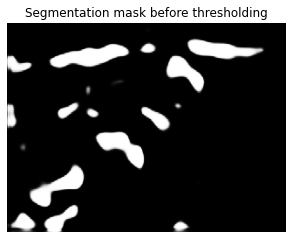

In [17]:
# plot the first segmentation mask

plt.subplot(1, 1, 1)
plt.rcParams['figure.figsize'] = (5.0, 5.0)
plt.rcParams['image.cmap'] = 'gray'

plt.imshow(probs)

plt.title('Segmentation mask before thresholding')
plt.axis('off')
plt.show()

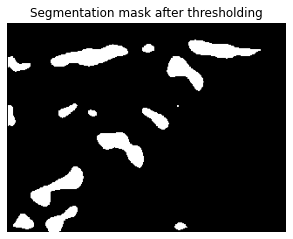

In [18]:
# Thresholding (one can specify any threshold values)
threshold = 0.8
probs[probs<threshold] = 0.
probs[probs>=threshold] = 1.

plt.subplot(1, 1, 1)
plt.rcParams['figure.figsize'] = (5.0, 5.0)
plt.rcParams['image.cmap'] = 'gray'

plt.imshow(probs)

plt.title('Segmentation mask after thresholding')
plt.axis('off')
plt.show()


# Working code on Images

In [ ]:
from keras.preprocessing import image
import numpy as np
from keras.models import load_model
from instance_normalization import InstanceNormalization
from my_upsampling_2d import MyUpSampling2D
from FgSegNet_v2_module import loss, acc, loss2, acc2

def load_image(path, target_size):
    """Load and resize an image."""
    x = image.load_img(path, target_size=target_size)  # Resize image here
    x = image.img_to_array(x)
    x = np.expand_dims(x, axis=0)
    return x

# Define paths
image_path = '/home/ai/Namdeo/FGBG/datasets/CDnet2014_dataset/cameraJitter/sidewalk/input/in000031.jpg'
model_path = '/home/ai/Namdeo/FGBG/CDnetm/models25/baseline/mdl_highway.h5'

# Load and resize the input image to the required size
input_size = (240, 320)  # Height, Width
x = load_image(image_path, target_size=input_size)

# Load the model with custom layers
model = load_model(model_path, custom_objects={
    'MyUpSampling2D': MyUpSampling2D,
    'InstanceNormalization': InstanceNormalization,
    'loss': loss,
    'acc': acc,
    'loss2': loss2,
    'acc2': acc2
})

# Predict
probs = model.predict(x, batch_size=1, verbose=1)
print(probs.shape)  # (1, 240, 320, 1)

# Reshape and print the result
probs = probs.reshape([probs.shape[1], probs.shape[2]])
print(probs.shape)  # (240, 320)


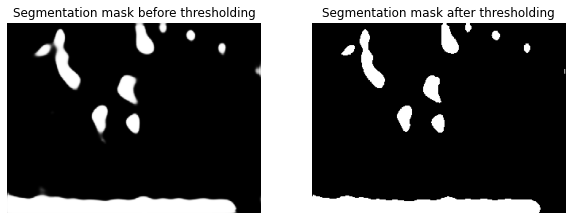

In [21]:
import matplotlib.pyplot as plt

# Plotting side by side
plt.rcParams['figure.figsize'] = (10.0, 5.0)  # Adjust figure size
plt.rcParams['image.cmap'] = 'gray'  # Set colormap to gray

# Original segmentation mask
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st plot
plt.imshow(probs)
plt.title('Segmentation mask before thresholding')
plt.axis('off')

# Thresholding
threshold = 0.8
probs[probs < threshold] = 0.
probs[probs >= threshold] = 1.

# Segmentation mask after thresholding
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd plot
plt.imshow(probs)
plt.title('Segmentation mask after thresholding')
plt.axis('off')

# Display the plots
plt.show()
